### Name: Sohan Rudra
### Roll No: 16MA20054

In [16]:
#library imports
import math
import time
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib notebook

In [23]:
#some boilerplate code
#Equation = namedtuple('Equation',('alpha'))
Conditions = namedtuple('Conditions',('dx','x0','xn','tn','r'))

In [6]:
%%latex
\begin{align}
u_t + u_x = 0\\

    u(x,0)= 
\begin{cases}
    20x,& \text{if } 0 \geq x\leq 0.05\\
    20(0.1-x), & \text{if } 0.05 \geq x\leq 0.1\\
    0, & otherwise
\end{cases}\\

u(0,t) = 0
\end{align}

<IPython.core.display.Latex object>

In [11]:
def u_i(x):
    if (x >= 0 and x <= 0.05):
        return 20*x
    elif (x > 0.05 and x <= 0.1):
        return 20*(0.1 - x)
    else:
        return 0.0

In [22]:
def initilize(cond):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    x_s = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    u = np.zeros(nx+1)
    for i, xi in enumerate(x_s):
        u[i] = u_i(xi)
    return u

In [32]:
def Upwind_SOLVER(cond, sols):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    u = copy(sols)
    for i in range(1,nx):
            u[i] = sols[i] - cond.r * (sols[i] - sols[i-1])
    return u

In [28]:
def Solver(cond):
    U_solve = []
    dt = cond.r*cond.dx
    u_i = initilize(cond)
    U_solve.append(u_i)
    u_k = Upwind_SOLVER(cond, u_i)
    for _ in range(cond.tn):
        u_i = copy(u_k)
        U_solve.append(u_i)
        u_k = Upwind_SOLVER(cond, u_i)
    U_solve.append(u_k)
    return U_solve

In [46]:
cond = Conditions(0.01,0,0.1,10,0.2)
u = Solver(cond)
len(u)

12

11


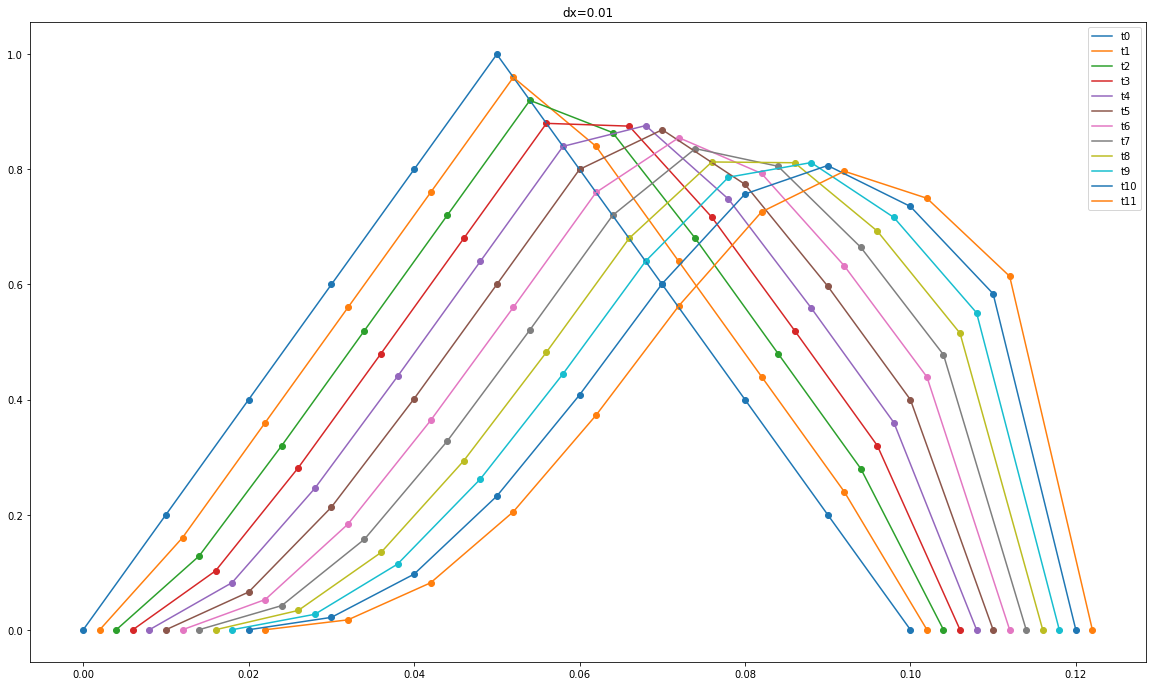

In [47]:
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
dt = cond.r*cond.dx
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
ax.set_title("dx=0.01")
g = []
print(len(u[0]))
for i in range(len(u)):
    x_range = np.arange(cond.x0 + dt*i, cond.xn + dt*i + cond.dx, cond.dx)
    if (x_range.shape[0] == 12):
        x_range = x_range[:-1]
    ax.plot(x_range, u[i])
    ax.scatter(x_range, u[i])
    g.append("t"+str(i))
ax.legend(tuple(g))
fig.show()

In [48]:
cond = Conditions(0.001,0,0.1,10,0.2)
u = Solver(cond)
len(u)

12

101


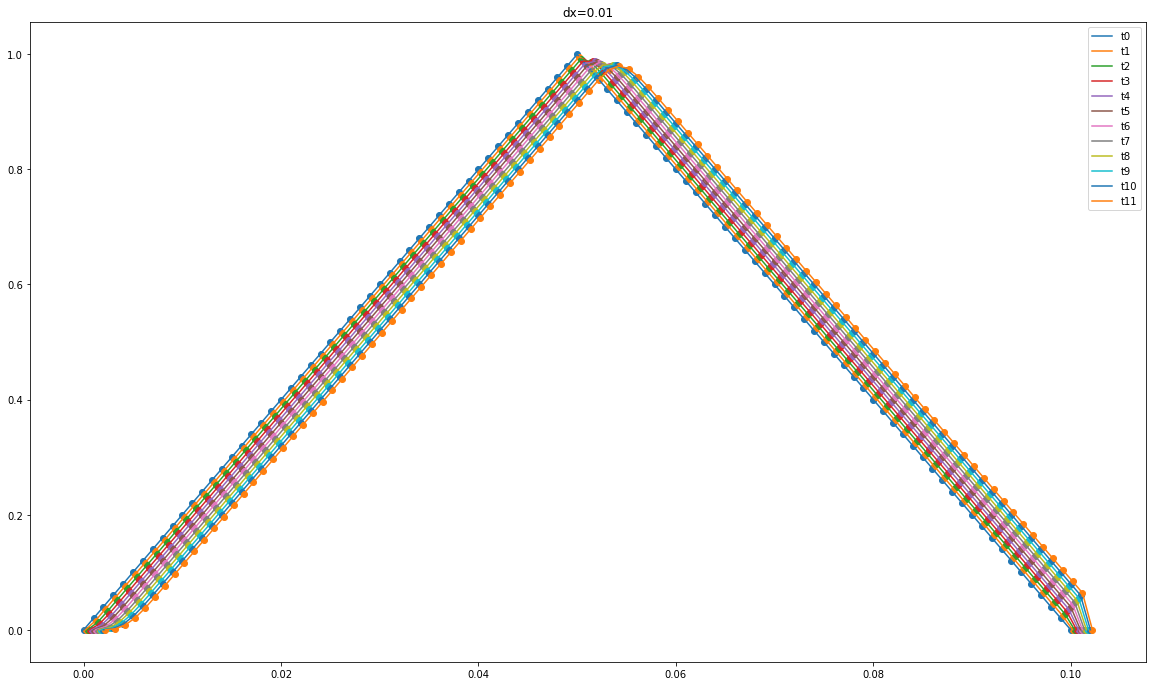

In [50]:
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
dt = cond.r*cond.dx
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
ax.set_title("dx=0.01")
g = []
print(len(u[0]))
for i in range(len(u)):
    x_range = np.arange(cond.x0 + dt*i, cond.xn + dt*i + cond.dx, cond.dx)
    if (x_range.shape[0] == len(u[0]) + 1):
        x_range = x_range[:-1]
    ax.plot(x_range, u[i])
    ax.scatter(x_range, u[i])
    g.append("t"+str(i))
ax.legend(tuple(g))
fig.show()